# Exploratory Data Analysis (EDA) in Airbnb

Airbnb is a digital platform that offers accommodation aroud the world. These places can be owned by individuals or companies and through the platform hosts and guests get in touch to secure payments, answer doubts/questions and ultimately to guarantee a pleasant stay. For the following study, Airbnb data in NYC will be explored to answer some important questions. 

## Agenda

Data should be explored in order to detect which information is the most relevant and set a list of questions that shall be answered accordingly. To keep it organized, the study will be divided in 5 main parts and the process shall be described in a series of steps.

- **Introduction:** this phase covers the basics, set the initial layout and make a first approach to the variables. Understanding where we are standing is key for the project.
- **Research Questions & Hypothesis:** once the author is familiarized with the data and variables some inferences and assumptions shall be made.
- **Data Pre-processing:** after the questions are set, the author must clean the data and do some manipulations/calculations to present accurate results. 
- **Results & Analysis:** results are presented supported by graphs. Intepretations of data and answers to research questions and hypothesis are also addressed in this part.
- **Conclusion:** quick summary of the study and final insights and considerations are made.

## 1. Introduction

### 1.1 Import Python Libraries

The first steps consists in importing all the libraries required for the analysis.
- **Pandas** and **Numpy** for Data Manipulation and Mathematical Calculations.
- **Seaborn** and **Pyplot** for Data Visualization.

In [278]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1.2 Reading the Dataset

Before any manipulation or calculation, raw data shall be presented. The data is contained in a csv file and we want to display the first 5 rows to give a quick overview of the dataframe. 

In [279]:
data = pd.read_csv(r"C:\Users\yengl\Desktop\CodeOp\EDA\data\airbnb_nyc.csv")

data.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


### 1.3 Analyze the Data

In this step an exhaustive examination of the variables will be made before making any inferences. This step is crucial because gives general insights about the dataset.

In [280]:
data.shape

(30179, 81)

our dataset has 30179 rows and 81 columns. Let's explore the columns (variables) a bit further. 

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16622 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

Observing the variables listed, some considerations are made:
- Variables like 'gym', 'elevator', 'pets_allowed', 'parking', 'tv', 'internet', 'child_friendly', 'coffee_machine', 'air_conditioning', etc are also considered in amenities, these featues might have an impact on the price. Another table called "amenities" could be created using dummy variables to reduce the quantity of columns in this dataset, using the id of the property as the primary key.

- All the variables have relevance at some degree, especially when they are combined to each other. However, in order to have a comprehensive but short look of the dataset, 5 variables were selected as the most importants to be considered:
    - price: this variable helps to identify possible trends and establish comparisons when combined with other variables. Most of the time, price is a decisive factor when selecting a place to stay.
    - neighbourhood: this variable might indicate which locations are more demanded and contributes to explain variations in prices. 
    - property_type: this variable could be useful to identify a trend in the selection on the type of property.
    - room_type: sometimes guests are allowed to rent the full property or just a room.
    - availability_365: As we don't have a column that specifies the range of dates for this dataset, we may calculate using this variable hoy many nights during the year was the property rented and measure popularity of the property.

Other variables related to reviews and hosts might be considered important when selecting an accommodation, because they talk about the credibility and reliability of a host or property. However, the author considers that more weight has the price regarding the rental of a property over the "popularity". At the end everything reduces to the revenue and profitability of a transaction, when properties are selected several times, it should reflect in postive reviews. 

As the data doesn't offer information related to dates, it will not be possible to establish a trend according to seasons or specific dates.

## 2. Research Questions & Hypothesis

**Research Questions:**

2.1. What is the average price per night in each neighbourhood?

2.2. Which one is the most popular neighbourhood?

2.3. Which are the most frequently booked properties?

2.4 What is the most rented type of the property?

2.5 What type of room is the most rented?

**Hypothesis:**
- The price of accommodations will be related to the neighbourhood.

## 3. Data Pre-processing

In order to answer the questions listed in the previous part, some data manipulation should be done, like checking for duplicates and missing values.
First, let's remember the size of our dataframe (30179 rows, 81 columns) and now we check for duplicates:

In [282]:
print(f"Number of rows: {data.shape[0]}")
data.drop_duplicates(inplace=True)
print(f"Number of rows: {data.shape[0]}")

Number of rows: 30179
Number of rows: 30179


According to the previous result, there are no identical rows in our dataset. We proceed to check for null values.

-We define a variable column_totals that will sum every row in each column that has a value (not null).

-Then another variable is defined: values_missing, where we substract the total of columns with not null values from the complete amount of rows. 

This allows us to identify which columns have missing values and how they impact our analysis.

In [283]:
column_totals = data.notnull().sum()
values_missing = 30179 - (column_totals.loc[column_totals < data.shape[0]])
print(values_missing)

name                              13
summary                         1218
description                      604
neighborhood_overview          12066
transit                        11989
house_rules                    13557
host_since                         9
host_response_time             13097
host_response_rate             13097
host_is_superhost                  9
host_listings_count                9
host_identity_verified             9
neighbourhood                      9
review_scores_rating            9085
review_scores_accuracy          9111
review_scores_cleanliness       9101
review_scores_checkin           9129
review_scores_communication     9110
review_scores_location          9132
review_scores_value             9130
reviews_per_month               8260
dtype: int64


Checking the variables we selected as the most important (price, neighbourhood, property_type, room_type and availability_365), we could see that there are no missing values or less than 0.05% of missing values. However, the variable review_scores_value is missing approximately 30% of the values, which might impact one of our initial hypothesis.

In the following part we will 

## 4. Results and Analysis

In this section we will run some codes and display some visualizations in order to answer the Research Questions and test our Hypotheses.
First we will check which Neighbourhoods have the majority of listings.

In [321]:
popular_neighbourhood = data.value_counts('neighbourhood').sort_values(ascending=False)
neighbourhood_top_10 = popular_neighbourhood.head(10).index.tolist()
data_neighbourhoods = data[data['neighbourhood'].isin(neighbourhood_top_10)]
print(popular_neighbourhood)

neighbourhood
Brooklyn              7024
Manhattan             6022
Queens                1695
Williamsburg          1238
Bedford-Stuyvesant    1134
                      ... 
Dyker Heights            1
Dongan Hills             1
Meiers Corners           1
New Brighton             1
New Springville          1
Name: count, Length: 186, dtype: int64


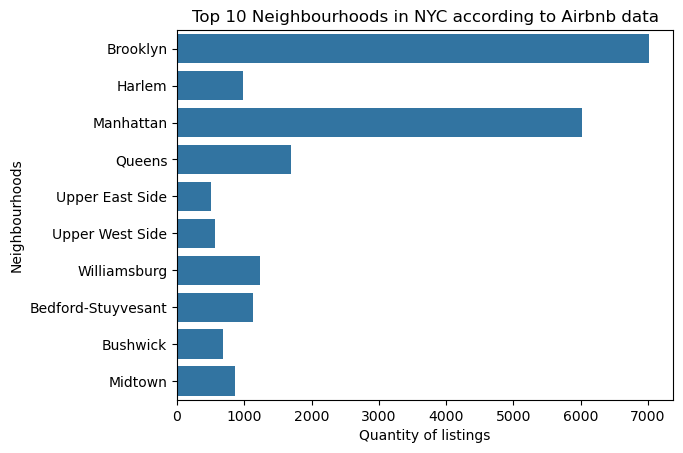

In [322]:
sns.countplot(
    data = data_neighbourhoods,
    y = 'neighbourhood'
)

plt.title("Top 10 Neighbourhoods in NYC according to Airbnb data")
plt.xlabel("Quantity of listings")
plt.ylabel("Neighbourhoods")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

The Neighbourhoods with more properties listed are: 
- Brooklyn
- Manhattan
- Queens
- Williamsburg 
- Bedford-Stuyvesant 

On the other hand, the Neighbourhoods with less properties lister are: 
 - Dyker Heights
 - Dongan Hills
 - Meiers Corners
 - New Brighton
 - New Springville

But having a Neighbourhood with a lot of properties, does not mean it is a popular one, so we need to check the availability throughout the year, meaning that those properties with less availability are the most popular ones.

In [296]:
booked = data[data['availability_365']==0]
fully_booked = booked.value_counts('neighbourhood')
print(fully_booked)

neighbourhood
Brooklyn              3523
Manhattan             2935
Williamsburg           781
Queens                 546
Bedford-Stuyvesant     524
                      ... 
Sea Gate                 1
Rosebank                 1
Port Morris              1
Hillcrest                1
Allerton                 1
Name: count, Length: 140, dtype: int64


In [297]:
fully_booked_top_10 = fully_booked.head(10).index.tolist()
data_booked_top_10 = data[data['neighbourhood'].isin(fully_booked_top_10)]

Now we filtered all those properties that are least available throughout the year. And we created a new subset of the top 10 least available properties according to the Neighbourhood. 

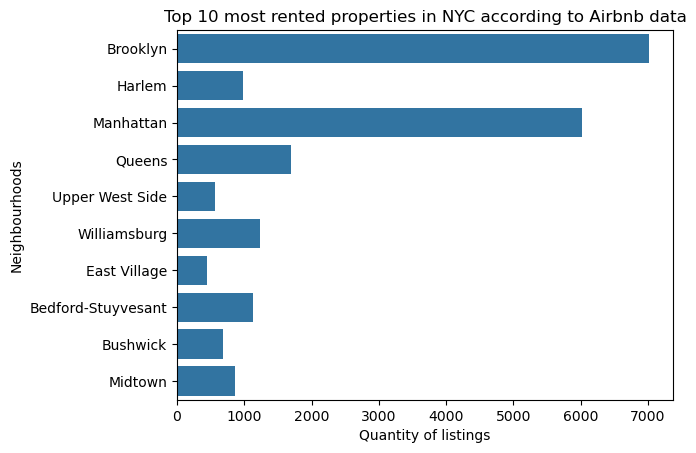

In [298]:
sns.countplot(
    data = data_booked_top_10,
    y = 'neighbourhood'
)
plt.title("Top 10 most rented properties in NYC according to Airbnb data")
plt.xlabel("Quantity of listings")
plt.ylabel("Neighbourhoods")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

It seems that the most rented properties are located in Brooklyn, Manhattan, Williamsburg, Queens and Bedford-Stuyvesant.

When a comparison is made between the Neighbourhoods of interest, (the ones with more listings and the listings with no availability throughout the year), we could see that there is a rate of occupancy around the 50%. 

Other Neighbourhoods have a rate of occupancy near the 100%, but the amount of listings is less so it is logical that the rate of occupancy is higher.

In [314]:
comparison = fully_booked *100 /popular_neighbourhood
comparison_2 = comparison.sort_values(ascending=False)
selected_columns = comparison_2[['Brooklyn', 'Manhattan', 'Williamsburg', 'Queens' and 'Bedford-Stuyvesant']]
print(selected_columns)

neighbourhood
Brooklyn              50.156606
Manhattan             48.737961
Williamsburg          63.085622
Bedford-Stuyvesant    46.208113
Name: count, dtype: float64


Now, let's explore the prices across the different Neighbourhoods.

In [320]:
avg_price = data_neighbourhoods['price'].mean()
print(avg_price)

133.03590213772137


The average price of an accommodationin NYC is 133.04. Let's evaluate it's fluctuation across the different Neighbourhoods.

neighbourhood
Midtown               210.866123
Upper East Side       174.634766
Manhattan             168.384590
Upper West Side       163.964727
Williamsburg          133.893376
Brooklyn              111.548405
Harlem                110.247706
Queens                 94.523304
Bedford-Stuyvesant     92.804233
Bushwick               81.751085
Name: price, dtype: float64


Text(0, 0.5, 'Neighbourhoods')

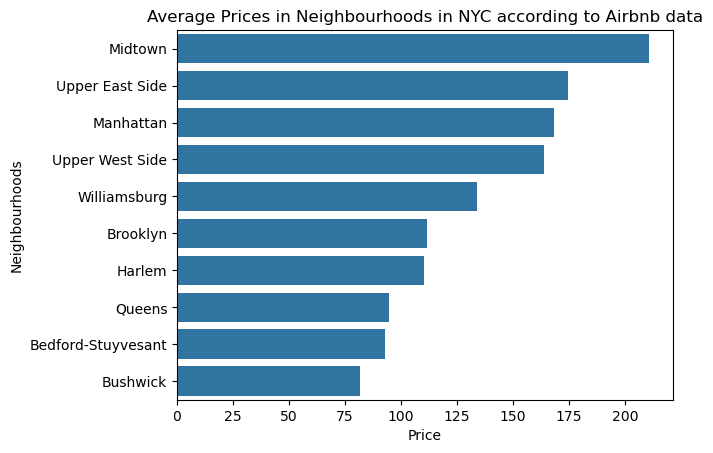

In [315]:
average_prices = data_neighbourhoods.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
print(average_prices)

sns.barplot(
    y = average_prices.index,
    x = average_prices.values
)
plt.title("Average Prices in Neighbourhoods in NYC according to Airbnb data")
plt.xlabel("Price")
plt.ylabel("Neighbourhoods")

This graph showcases that the most expensive nights are spent in Midtown followed by Upper East Side, Manhattan, Upper West Side, Williamsburg and Brooklyn. Related to the average price in NYC, Manhattan has a price above the average price, while Brooklyn, Queens and Bedford_Stuyvesant have prices below the average. In the case of Williamsburg the price is exactly the average.

In [326]:
most_common_property_type = data.value_counts('property_type').sort_values(ascending=False)
print(most_common_property_type)

property_type
Apartment                 24538
House                      2125
Condominium                 982
Townhouse                   772
Loft                        740
Serviced apartment          290
Hotel                       192
Guest suite                 137
Boutique hotel              104
Other                        65
Bed and breakfast            63
Hostel                       43
Resort                       25
Guesthouse                   24
Bungalow                     19
Aparthotel                   11
Villa                         9
Tiny house                    7
Earth house                   4
Cabin                         4
Casa particular (Cuba)        3
Tent                          3
Cottage                       3
Boat                          3
Farm stay                     2
Houseboat                     2
Cave                          2
Yurt                          2
Dome house                    1
Castle                        1
Camper/RV                 

In [335]:
data.value_counts('room_type')

room_type
Private room       15101
Entire home/apt    14238
Shared room          840
Name: count, dtype: int64

## 5. Conclusion

This study gave a quick overview among multiple variables that may impact the guests' decision when selecting a property for a few nights. Then main focus was centered in the price, the location of the property and the type of property. 

To understand how popular a Neighbourhood was, it was simply selected by the Neighbourhoods with the greatest quantity of listings. In order to check which properties were the most popular a crossed examination was made comparing the availability during the year mong the properties in every Neighbourhood, leading to understand that the properties that were occupied most time during the year were the ones more popular.

The average rice of accommodation in NYC is around 133$. During the Results and Analysis phase, we could see that the most popular Neighbourhood was Brooklyn having a rate of occupancy of 50% and having an average price of 111.5$ per night, followed by Manhattan with a 48% of rate of occupancy and an price per night of 168.3$.

The most rented properties were Apartments (24538 units) and the most rented rooms were Private rooms followed closely by Entire home/apt.

In the future a great complement for this study would be evaluate the typeof property and the type of room in each Neighbourhood and evaluate the reviews of this properties and if the host is a superhost or not.

For the selection of variables a matrix of correlations would be suggested, just to make sure that the appropriate variables were selected. As thi is an initial project, the author considers that doing this matrix is out of the current knowledge.